In [25]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

import pandas as pd
import numpy as np

# TRAIN_START_DATE = '2010-01-01'
# TRAIN_END_DATE = '2021-10-01'
# TEST_START_DATE = '2021-10-01'
# TEST_END_DATE = '2024-03-01'

# TODO extend this test date
# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'
# ensemble_result_file = "result.csv"

# TODO extend this test date
# PLOT_DATES_TEST_START = '2019-01-03'
# PLOT_DATES_TEST_END = '2020-12-28'
# ensemble_result_file = "result20192022.csv"
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]

PLOT_DATES_TEST_START = '2012-01-03'
PLOT_DATES_TEST_END = '2023-12-29'
ensemble_result_file = "result.csv"

value_to_remove = "DOW"
# Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]

# TODO Try a longer date range, Some columns have issues over this date range
# Value to be removed
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]
# print(DOW_30_TICKER)
# PLOT_DATES_TEST_START = '2015-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'




df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


# # They replace close price with adjusted close price
# df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
#                      end_date = PLOT_DATES_TEST_END,
#                      ticker_list = [
#     "AMGN",
#     "AAPL",
#     "AMAT",
#     "INTC",
#     "PCAR",
#     "PAYX",
#     "MSFT"]).fetch_data()

print(df.head())


# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for o-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (87493, 8)
         date       open       high        low      close     volume   tic  \
0  2012-01-03  14.621429  14.732143  14.607143  12.402629  302220800  AAPL   
1  2012-01-03  64.949997  65.190002  63.450001  45.917778   10216800  AMGN   
2  2012-01-03  48.299999  48.959999  48.139999  40.249275    6955400   AXP   
3  2012-01-03  74.699997  75.000000  74.120003  60.731087    6859300    BA   
4  2012-01-03  92.769997  95.110001  92.769997  67.120628    8177000   CAT   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  
Number of rows containing null values: 0
Check for o-nulls
True


In [26]:
def calculate_final_investment(X, B, initial_investment, buy_cost=0.001, sell_cost=0.001):
    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."

    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    
    # Calculate transaction costs
    transaction_costs = (B.diff().abs() * buy_cost).sum(axis=1) + (B.diff().abs() * sell_cost).sum(axis=1)
    transaction_costs.iloc[0] = 0  # No transaction cost for the first period
    
    # Adjust the returns by subtracting the transaction costs
    adjusted_weighted_log_returns = weighted_log_returns - transaction_costs
    
    # Calculate cumulative log returns
    cumulative_log_returns = adjusted_weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

In [27]:
# Current and Target Weights
current_weights = pd.Series({'A': 0.5, 'B': 0.3, 'C': 0.2})
target_weights = pd.Series({'A': 0.4, 'B': 0.4, 'C': 0.2})

# Portfolio Value
portfolio_value = 100000

# Current Values
current_values = current_weights * portfolio_value

# Target Values
target_values = target_weights * portfolio_value

# Calculate Buy and Sell Amounts
buy_amounts = target_values[target_values > current_values] - current_values[target_values > current_values]
sell_amounts = current_values[current_values > target_values] - target_values[current_values > target_values]

print("Buy Amounts:\n", buy_amounts)
print("Sell Amounts:\n", sell_amounts)

Buy Amounts:
 B    10000.0
dtype: float64
Sell Amounts:
 A    10000.0
dtype: float64


In [28]:
import pandas as pd


df = pd.DataFrame(df)

print(df.dtypes)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)



# If we pivot and there are nulls, it means some dates dont have all prices
# Count rows with any null values
# Identify columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Identify rows with null values
rows_with_nulls = pivot_df[pivot_df.isnull().any(axis=1)]

print("Columns with null values:", columns_with_nulls)
print("Rows with null values:\n", rows_with_nulls)

print("Check for o-nulls")
print(pivot_df.notnull().all().all())


assert pivot_df.notnull().all().all()


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
tic               AAPL        AMGN         AXP          BA         CAT  \
date                                                                     
2012-01-03   12.402629   45.917778   40.249275   60.731087   67.120628   
2012-01-04   12.469277   45.667091   40.274345   60.821102   67.741989   
2012-01-05   12.607714   46.132645   40.741871   60.166489   68.220497   
2012-01-06   12.739512   46.383327   40.299370   60.534721   68.391914   
2012-01-09   12.719307   45.982227   40.399551   60.984756   69.348930   
...                ...         ...         ...         ...         ...   
2023-12-21  193.944031  273.305603  182.603516  262.019989  286.516785   
2023-12-22  192.868149  278.031464  183.374298  260.440002  286.803223   
2023-12-26  192.320206  277.777039  183.759705  262.790009  292.008667   
2023-12-27  192.419830  280.

<Axes: xlabel='date'>

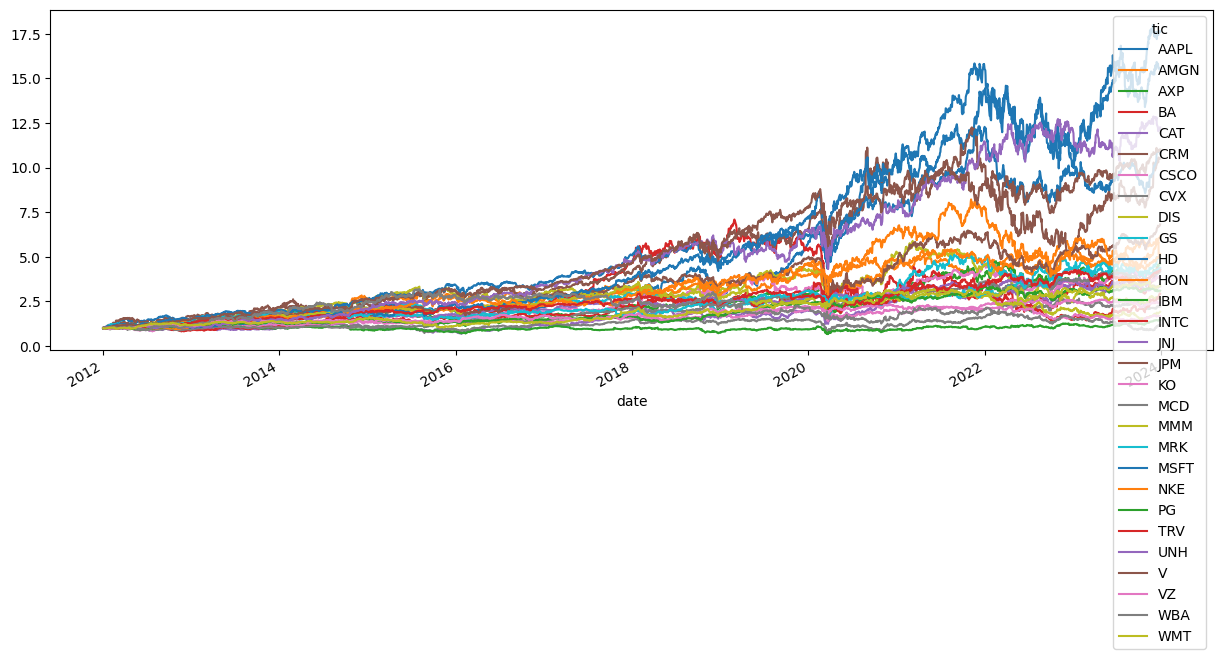

In [29]:
import matplotlib.pyplot as plt
# plot normalized prices of these stocks
(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:233: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_al

Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.58 ± 0.31
    Ulcer index: 0.62
    Information ratio (wrt benchmark): 0.12
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.02 ± 0.29
    Beta / Alpha: 1.23 / -0.602%
    Annualized return: 18.53%
    Annualized volatility: 32.15%
    Longest drawdown: 1320 days
    Max drawdown: 81.06%
    Winning days: 52.4%
    Annual turnover: 309.0
        


[<Axes: xlabel='date', ylabel='Total wealth'>,
 <Axes: xlabel='date', ylabel='weights'>]

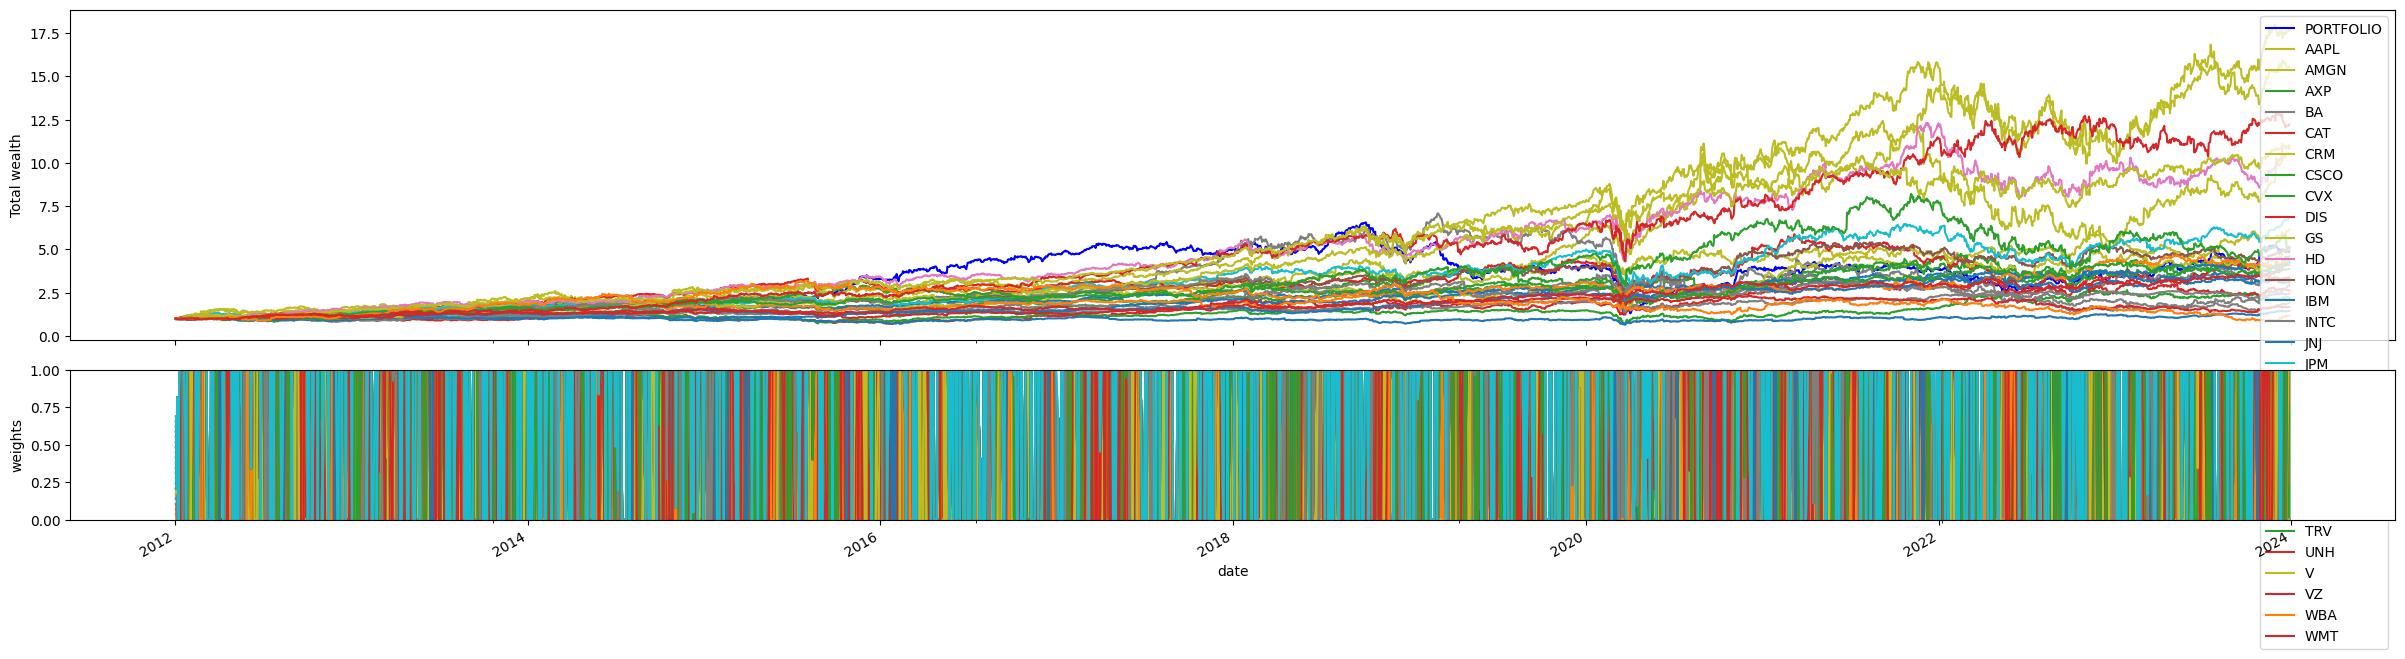

In [30]:
from online_algos import OLMAR, BCRP, CRP, BAH, UP


# Simple Moving Average (SMA) vs. Exponential Moving Average (EMA)
# Simple Moving Average (SMA)
# Calculation: Averages the prices over a specified period.

# Sensitivity: Less sensitive to recent price changes because each period has equal weight.

# Lag: More lag compared to EMA, meaning it reacts slower to price changes.

# Use Case: Suitable for identifying longer-term trends.

# Exponential Moving Average (EMA)
# Calculation: Gives more weight to recent prices, making it more responsive.

# Sensitivity: More sensitive to recent price changes due to the weighting factor.

# Lag: Less lag compared to SMA, meaning it reacts faster to price changes.

# Use Case: Better for short-term trading strategies and identifying rapid changes.


algo = OLMAR(window=5, eps=10, ma_type="SMA")

result_olmar = algo.run(pivot_df)
print(result_olmar.summary())
result_olmar.plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.58 ± 0.31
    Ulcer index: 0.62
    Information ratio (wrt benchmark): 0.12
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.02 ± 0.29
    Beta / Alpha: 1.23 / -0.602%
    Annualized return: 18.53%
    Annualized volatility: 32.15%
    Longest drawdown: 1320 days
    Max drawdown: 81.06%
    Winning days: 52.4%
    Annual turnover: 309.0
        
Summary:
    Profit factor: 0.90
    Sharpe ratio: -0.38 ± 0.30
    Ulcer index: -0.22
    Information ratio (wrt benchmark): -1.10
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -1.25 ± 0.29
    Beta / Alpha: 1.23 / -31.533%
    Annualized return: -12.38%
    Annualized volatility: 32.22%
    Longest drawdown: 2989 days
    Max drawdown: 91.87%
    Winning days: 48.1%
    Annual turnover: 309.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:277: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > peak:
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = x[i]


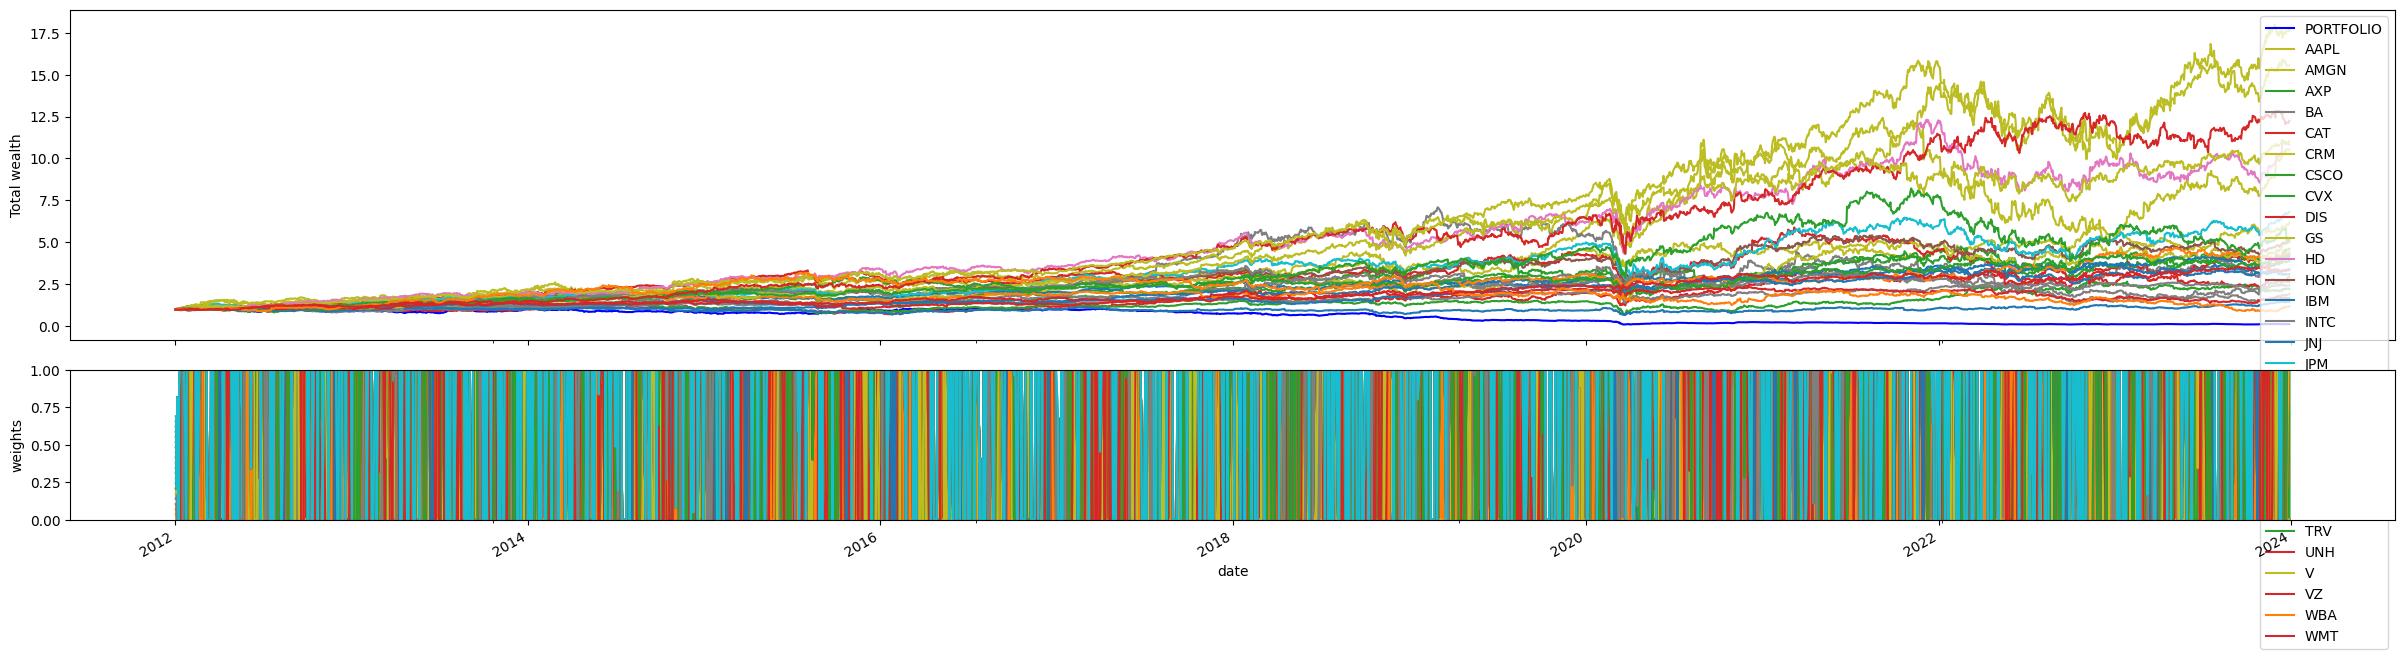

In [31]:
olmar_B = result_olmar.B
olmar_X = result_olmar.X
print(result_olmar.summary())


result_olmar.fee = 0.001
print(result_olmar.summary())
result_olmar.plot()
olmar_B_fee = result_olmar.B
olmar_X_fee = result_olmar.X


# Cimpare results to makret

Summary:
    Profit factor: 0.96
    Sharpe ratio: -0.07 ± 1.01
    Ulcer index: -0.11
    Information ratio (wrt benchmark): 0.13
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): 0.20 ± 1.01
    Beta / Alpha: 1.28 / 5.069%
    Annualized return: -2.37%
    Annualized volatility: 36.16%
    Longest drawdown: 218 days
    Max drawdown: 37.40%
    Winning days: 49.2%
    Annual turnover: 212.5
        
Summary:
    Profit factor: 0.87
    Sharpe ratio: -0.65 ± 1.11
    Ulcer index: -0.88
    Information ratio (wrt benchmark): -0.68
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): -0.63 ± 1.01
    Beta / Alpha: 1.28 / -16.245%
    Annualized return: -23.62%
    Annualized volatility: 36.30%
    Longest drawdown: 218 days
    Max drawdown: 44.97%
    Winning days: 48.0%
    Annual turnover: 212.5


When factoring in the fees, our portiolo is underperfomring the market in sharpe ratio and returns

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.001334e+06
2012-01-05    1.011840e+06
2012-01-06    1.009898e+06
2012-01-09    9.966047e+05
                  ...     
2023-12-21    4.911731e+06
2023-12-22    4.858354e+06
2023-12-26    4.857454e+06
2023-12-27    4.817433e+06
2023-12-28    4.893429e+06
Length: 3017, dtype: float64
             date        open        high         low       close     volume  \
0      2012-01-03   14.621429   14.732143   14.607143   12.402629  302220800   
1      2012-01-03   64.949997   65.190002   63.450001   45.917778   10216800   
2      2012-01-03   48.299999   48.959999   48.139999   40.249275    6955400   
3      2012-01-03   74.699997   75.000000   74.120003   60.731087    6859300   
4      2012-01-03   92.769997   95.110001   92.769997   67.120628    8177000   
...           ...         ...         ...         ...         ...        ...   
87488  2023-12-28  523.469971  527.869995  522.940002  518.790649    2001000   
87489  2

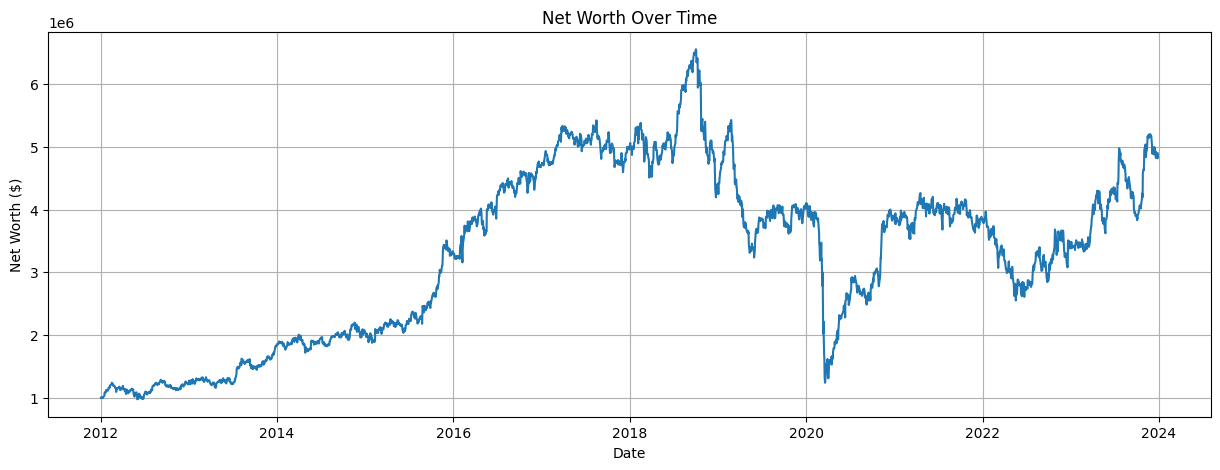

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.001334e+06
2012-01-05    1.009958e+06
2012-01-06    1.006796e+06
2012-01-09    9.919312e+05
                  ...     
2023-12-21    1.212407e+05
2023-12-22    1.196835e+05
2023-12-26    1.194223e+05
2023-12-27    1.184383e+05
2023-12-28    1.203067e+05
Length: 3017, dtype: float64
             date        open        high         low       close     volume  \
0      2012-01-03   14.621429   14.732143   14.607143   12.402629  302220800   
1      2012-01-03   64.949997   65.190002   63.450001   45.917778   10216800   
2      2012-01-03   48.299999   48.959999   48.139999   40.249275    6955400   
3      2012-01-03   74.699997   75.000000   74.120003   60.731087    6859300   
4      2012-01-03   92.769997   95.110001   92.769997   67.120628    8177000   
...           ...         ...         ...         ...         ...        ...   
87488  2023-12-28  523.469971  527.869995  522.940002  518.790649    2001000   
87489  2

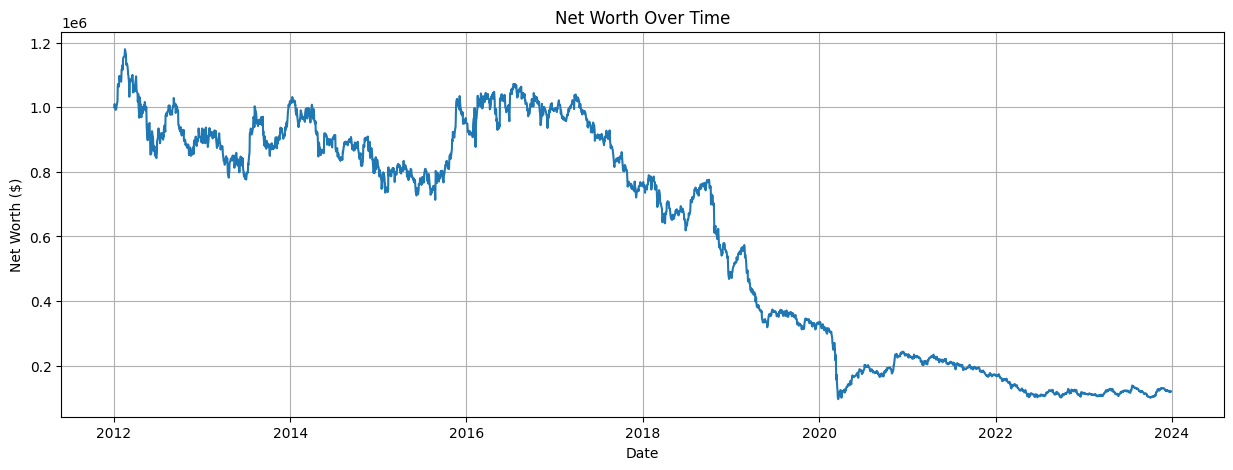

In [32]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_olmar = calculate_final_investment(olmar_X, olmar_B, initial_investment, 0, 0)

print("Net Worth Over Time:")
print(net_worth_olmar)

s = pd.Series(net_worth_olmar, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar.index, net_worth_olmar)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()


# with fees
# Calculate final investment amount
# Calculate the net worth over time
# TODO even a small fee on OLMAR seems to kill it
net_worth_olmar_fee = calculate_final_investment(olmar_X_fee, olmar_B_fee, initial_investment, 0.001, 0)

print("Net Worth Over Time:")
print(net_worth_olmar_fee)

s = pd.Series(net_worth_olmar_fee, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar_fee.index, net_worth_olmar_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# Other stuff
=======================================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

tic             AAPL          AMGN           AXP   BA           CAT  CRM  \
date                                                                       
2012-01-03  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2012-01-04  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2012-01-05  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2012-01-06  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2012-01-09  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
...              ...           ...           ...  ...           ...  ...   
2023-12-21  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2023-12-22  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2023-12-26  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2023-12-27  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   
2023-12-28  0.327292  7.658804e-16  1.214740e-15  0.0  7.502679e-16  0.0   

tic        

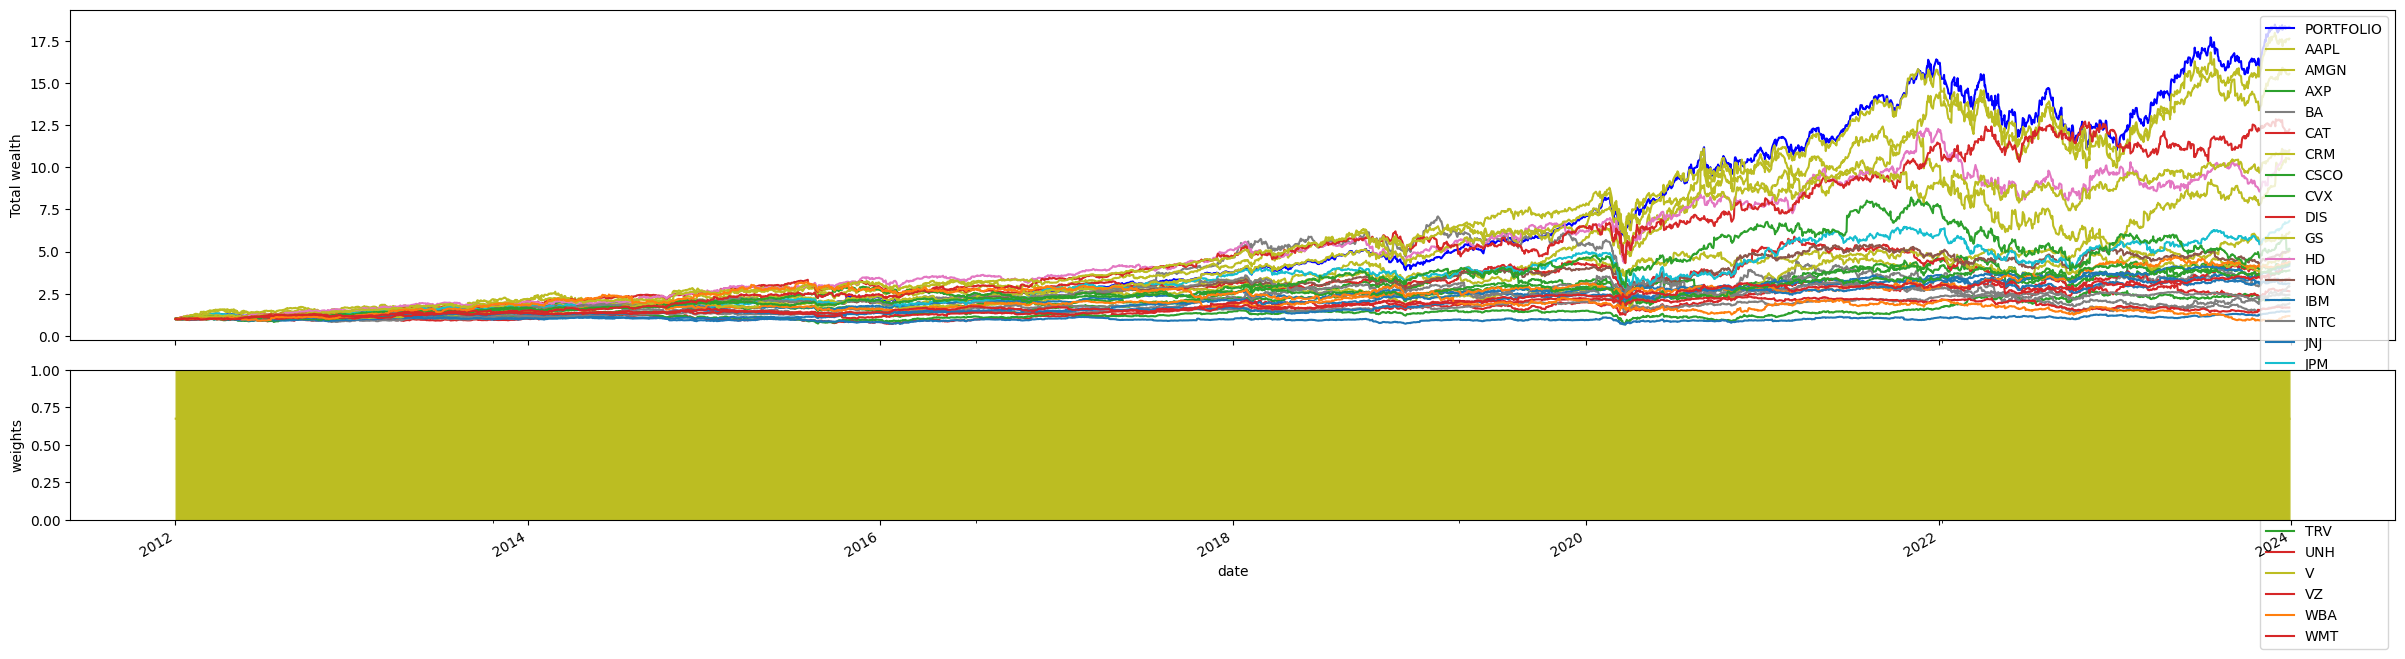

In [33]:
algo = BCRP(no_cash=True)
result = algo.run(pivot_df)

bcrp_B = result.B
print(result.B)
bcrp_X = result.X
print(result.X)
print(result.summary())
result.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.07 ± 0.36
    Ulcer index: 2.74
    Information ratio (wrt benchmark): 0.65
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): 0.53 ± 0.29
    Beta / Alpha: 1.13 / 8.587%
    Annualized return: 26.09%
    Annualized volatility: 24.48%
    Longest drawdown: 368 days
    Max drawdown: 33.51%
    Winning days: 54.0%
    Annual turnover: 1.2
        


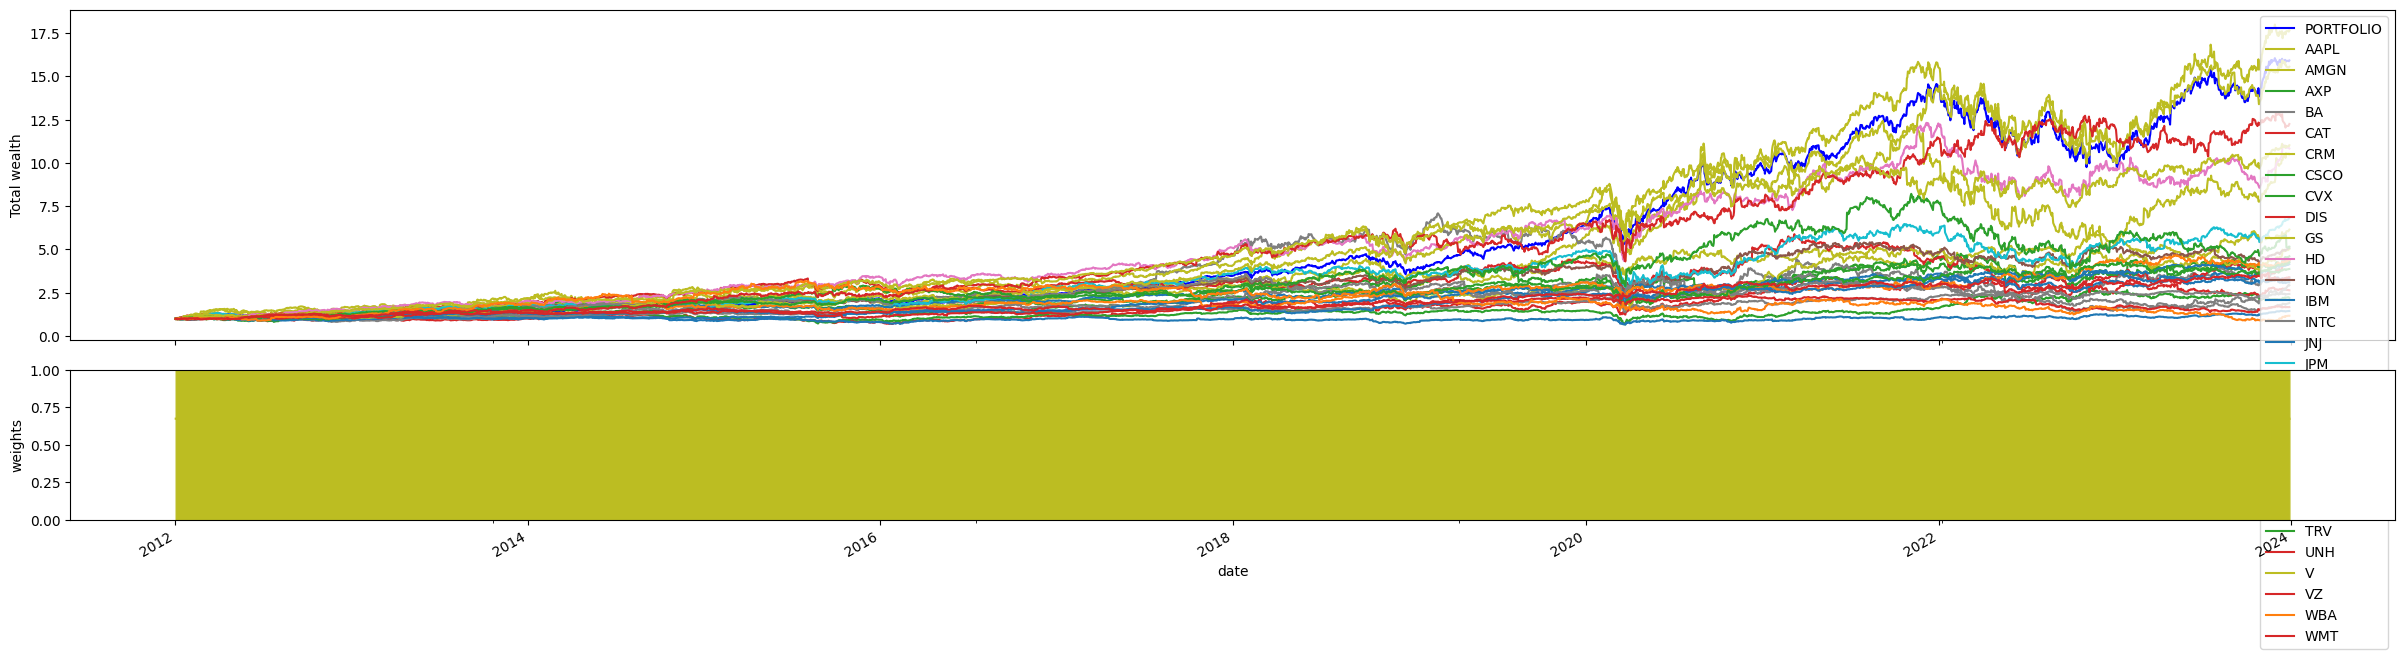

In [34]:
algo = BCRP(no_cash=True)
result_fee = algo.run(pivot_df)


# Here try setting a transaction fee
# Doesnt seem to do anything on BCRP becuase it doesn really change stocks
result_fee.fee = 0.01



bcrp_B_fee = result_fee.B
bcrp_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.017554e+06
2012-01-05    1.028246e+06
2012-01-06    1.042508e+06
2012-01-09    1.032720e+06
                  ...     
2023-12-21    1.690291e+07
2023-12-22    1.690375e+07
2023-12-26    1.689045e+07
2023-12-27    1.687541e+07
2023-12-28    1.692442e+07
Length: 3017, dtype: float64
             date        open        high         low       close     volume  \
0      2012-01-03   14.621429   14.732143   14.607143   12.402629  302220800   
1      2012-01-03   64.949997   65.190002   63.450001   45.917778   10216800   
2      2012-01-03   48.299999   48.959999   48.139999   40.249275    6955400   
3      2012-01-03   74.699997   75.000000   74.120003   60.731087    6859300   
4      2012-01-03   92.769997   95.110001   92.769997   67.120628    8177000   
...           ...         ...         ...         ...         ...        ...   
87488  2023-12-28  523.469971  527.869995  522.940002  518.790649    2001000   
87489  2

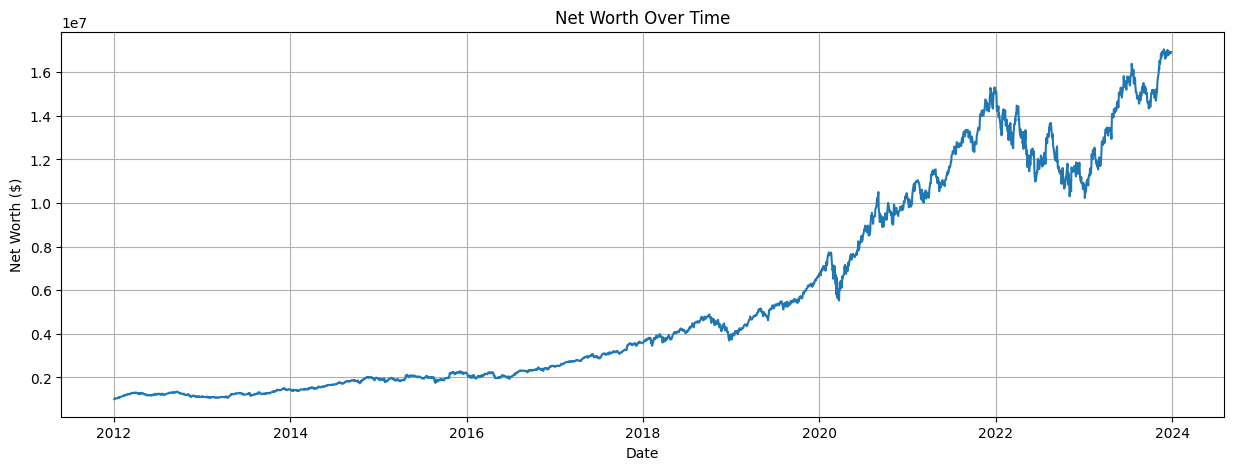

In [35]:


# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp_fee = calculate_final_investment(bcrp_X_fee, bcrp_B_fee, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp_fee)

s = pd.Series(net_worth_bcrp_fee, name='BCRP')

# Convert Series to DataFrame
olmar_bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp_fee.index, net_worth_bcrp_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.017554e+06
2012-01-05    1.028246e+06
2012-01-06    1.042508e+06
2012-01-09    1.032720e+06
                  ...     
2023-12-21    1.690291e+07
2023-12-22    1.690375e+07
2023-12-26    1.689045e+07
2023-12-27    1.687541e+07
2023-12-28    1.692442e+07
Length: 3017, dtype: float64
             date        open        high         low       close     volume  \
0      2012-01-03   14.621429   14.732143   14.607143   12.402629  302220800   
1      2012-01-03   64.949997   65.190002   63.450001   45.917778   10216800   
2      2012-01-03   48.299999   48.959999   48.139999   40.249275    6955400   
3      2012-01-03   74.699997   75.000000   74.120003   60.731087    6859300   
4      2012-01-03   92.769997   95.110001   92.769997   67.120628    8177000   
...           ...         ...         ...         ...         ...        ...   
87488  2023-12-28  523.469971  527.869995  522.940002  518.790649    2001000   
87489  2

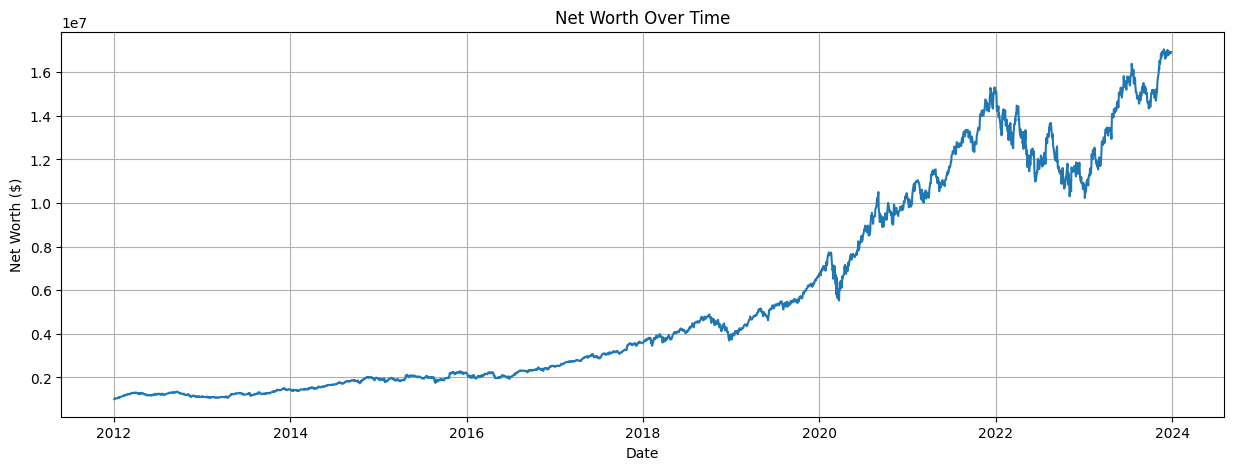

In [36]:
import pandas as pd
import numpy as np

# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp = calculate_final_investment(bcrp_X, bcrp_B, initial_investment, 0.1, 0.1)

print("Net Worth Over Time:")
print(net_worth_bcrp)

s = pd.Series(net_worth_bcrp, name='BCRP')

# Convert Series to DataFrame
bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp.index, net_worth_bcrp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                ensemble           dji          BCRP
date                                                
2021-04-06  1.000000e+06  1.000000e+06  1.089380e+07
2021-04-07  9.999937e+05  1.000479e+06  1.100183e+07
2021-04-08  9.999314e+05  1.002194e+06  1.117026e+07
2021-04-09  1.001303e+06  1.011079e+06  1.132133e+07
2021-04-12  1.000515e+06  1.009427e+06  1.127385e+07
...                  ...           ...           ...
2022-03-28  1.048540e+06  1.045637e+06  1.423481e+07
2022-03-29  1.062819e+06  1.055757e+06  1.446910e+07
2022-03-30  1.049422e+06  1.053801e+06  1.438977e+07
2022-03-31  1.031126e+06  1.037335e+06  1.413488e+07
2022-04-01  1.037415e+06           NaN  1.416112e+07

[252 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

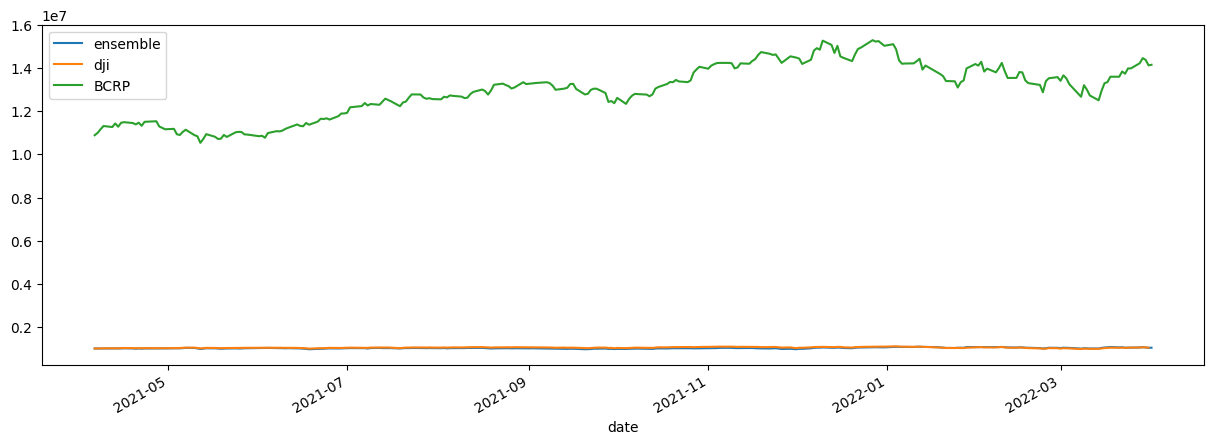

In [37]:
result = pd.DataFrame()
result = pd.read_csv("result.csv")

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

bcrp_df.index = pd.to_datetime(bcrp_df.index)

# Join DataFrames on date index
merged_df = result.join(bcrp_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.19
    Sharpe ratio: 0.95 ± 0.35
    Ulcer index: 3.08
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.00 ± 0.31
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 15.55%
    Annualized volatility: 16.32%
    Longest drawdown: 390 days
    Max drawdown: 33.09%
    Winning days: 55.6%
    Annual turnover: 2.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.94 ± 0.35
    Ulcer index: 3.00
    Information ratio (wrt benchmark): -35.30
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -1.90 ± 0.29
    Beta / Alpha: 1.00 / -0.200%
    Annualized return: 15.35%
    Annualized volatility: 16.32%
    Longest drawdown: 479 days
    Max drawdown: 33.12%
    Winning days: 55.6%
    Annual turnover: 2.0
        


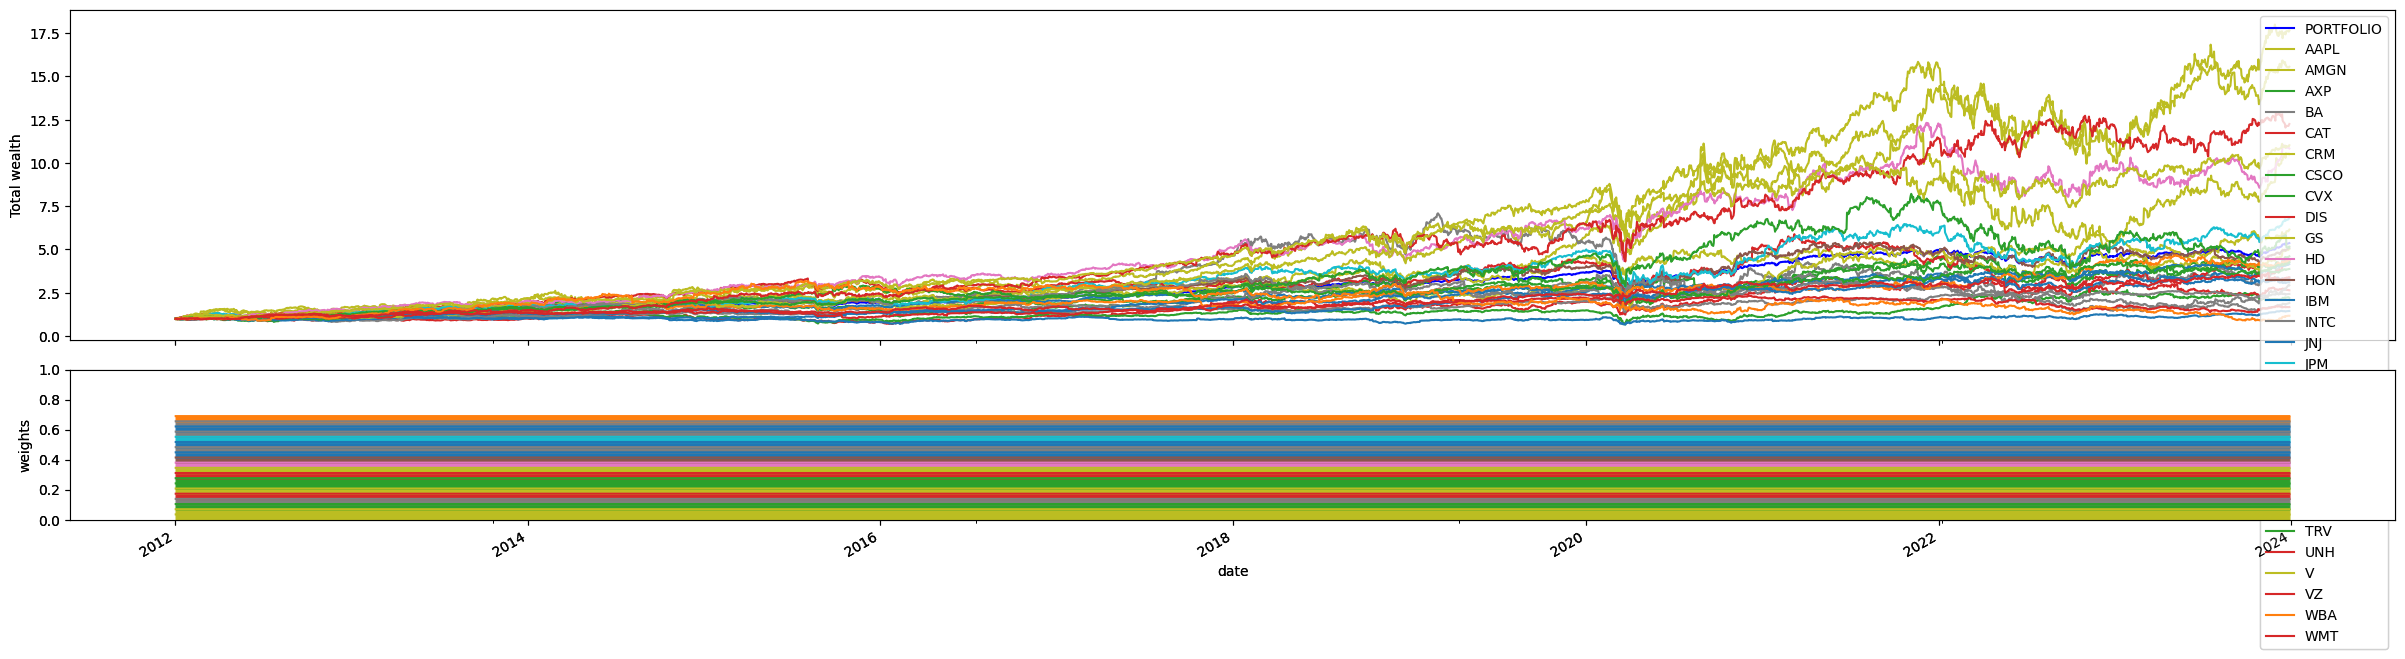

In [38]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())
result.plot();

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.001334e+06
2012-01-05    1.004744e+06
2012-01-06    1.003944e+06
2012-01-09    1.005730e+06
                  ...     
2023-12-21    4.369720e+06
2023-12-22    4.364787e+06
2023-12-26    4.390659e+06
2023-12-27    4.400913e+06
2023-12-28    4.407079e+06
Length: 3017, dtype: float64
             date        open        high         low       close     volume  \
0      2012-01-03   14.621429   14.732143   14.607143   12.402629  302220800   
1      2012-01-03   64.949997   65.190002   63.450001   45.917778   10216800   
2      2012-01-03   48.299999   48.959999   48.139999   40.249275    6955400   
3      2012-01-03   74.699997   75.000000   74.120003   60.731087    6859300   
4      2012-01-03   92.769997   95.110001   92.769997   67.120628    8177000   
...           ...         ...         ...         ...         ...        ...   
87488  2023-12-28  523.469971  527.869995  522.940002  518.790649    2001000   
87489  2

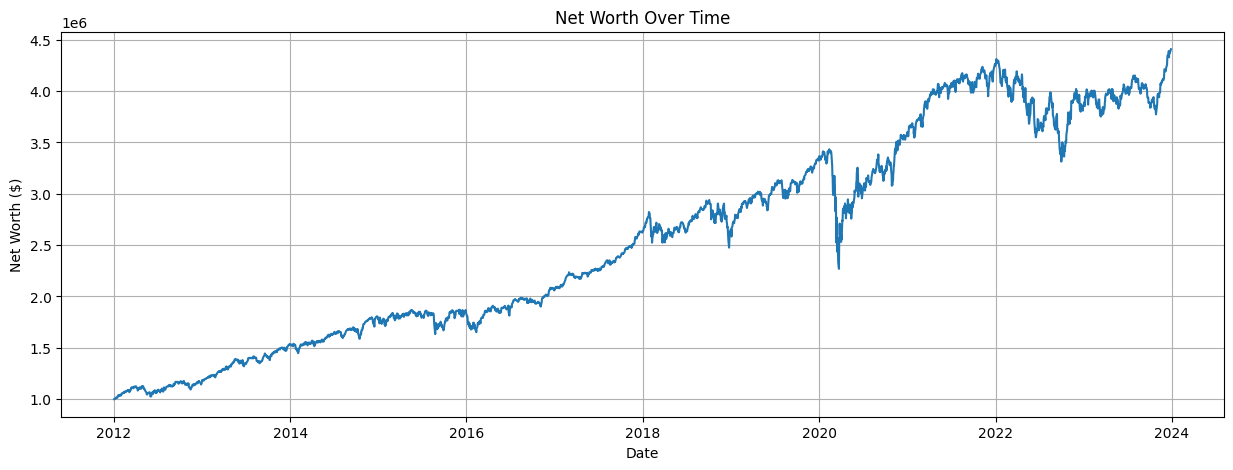

In [39]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_crp = calculate_final_investment(crp_X, crp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_crp)

s = pd.Series(net_worth_crp, name='CRP')

# Convert Series to DataFrame
crp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_crp.index, net_worth_crp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# How do we handle transaction cost here for online

The widely adopted transaction costs model is the proportional transaction costs model in which the incurred transaction cost is proportional
to the wealth transferred during rebalancing.

In [40]:
# algo = TCO1(no_cash=True)
# result = algo.run(list_result)

# tco_B = result.B
# print(result.B)
# tco_X = result.X
# print(result.X)
# print(result.summary())
# result.plot();

In [41]:
# # Initial investment amount
# initial_investment = 1000000

# # Calculate final investment amount
# # Calculate the net worth over time
# net_worth_tco = calculate_final_investment(tco_X, tco_B, initial_investment, 0 ,0)

# print("Net Worth Over Time:")
# print(net_worth_tco)

# s = pd.Series(net_worth_tco, name='OLMAR_tco')

# # Convert Series to DataFrame
# olmar_tco_df = s.to_frame()

# print(df)

# # Plotting the net worth over time
# plt.plot(net_worth_tco.index, net_worth_tco)
# plt.xlabel('Date')
# plt.ylabel('Net Worth ($)')
# plt.title('Net Worth Over Time')
# plt.grid(True)
# plt.show()


# result = pd.DataFrame()
# result = pd.read_csv("result.csv")

# result.set_index('date', inplace=True)

# print(result)
# print(result.dtypes)
# result.index = pd.to_datetime(result.index)

# print(olmar_tco_df)
# print(result.dtypes)
# olmar_tco_df.index = pd.to_datetime(olmar_tco_df.index)

# # Join DataFrames on date index
# merged_df = result.join(olmar_tco_df, how='inner')
# print(merged_df)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.19
    Sharpe ratio: 0.95 ± 0.35
    Ulcer index: 3.06
    Information ratio (wrt benchmark): 0.12
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): 0.01 ± 0.29
    Beta / Alpha: 1.00 / 0.002%
    Annualized return: 15.56%
    Annualized volatility: 16.33%
    Longest drawdown: 479 days
    Max drawdown: 33.08%
    Winning days: 55.6%
    Annual turnover: 1.9
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.94 ± 0.35
    Ulcer index: 2.98
    Information ratio (wrt benchmark): -1.85
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.96 ± 0.29
    Beta / Alpha: 1.00 / -0.191%
    Annualized return: 15.37%
    Annualized volatility: 16.33%
    Longest drawdown: 479 days
    Max drawdown: 33.11%
    Winning days: 55.5%
    Annual turnover: 1.9
        


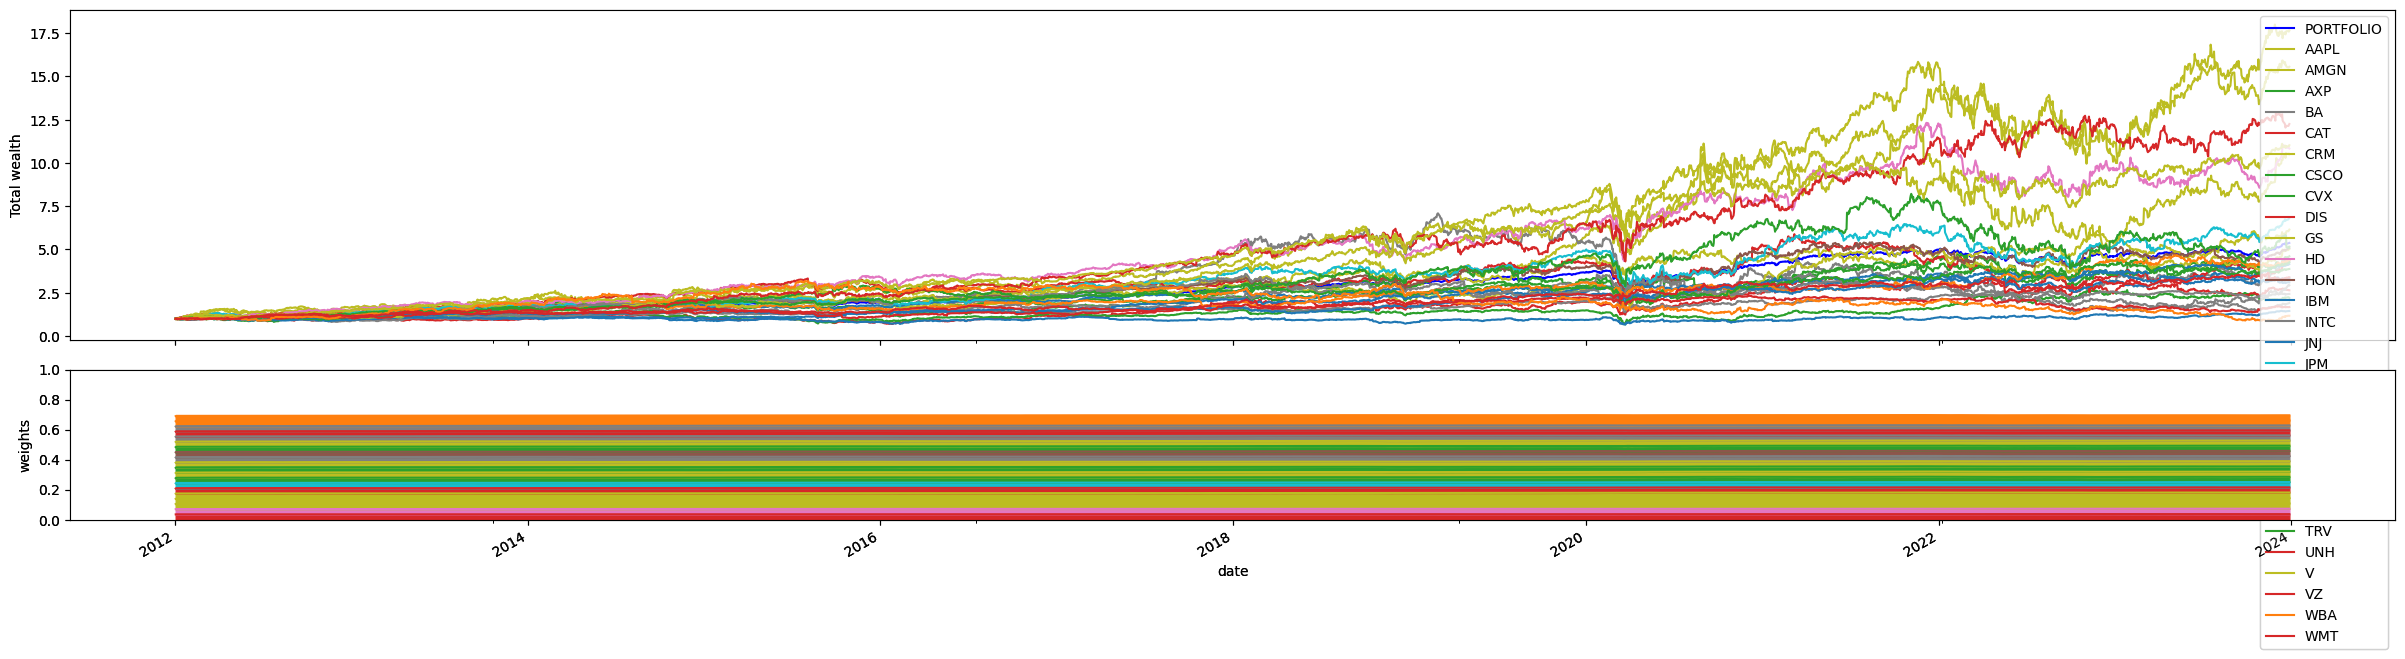

In [42]:
algo = UP()
result = algo.run(pivot_df)

up_B_fee = result.B
up_X_fee = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



up_B_fee = result_fee.B
up_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.001320e+06
2012-01-05    1.004724e+06
2012-01-06    1.003925e+06
2012-01-09    1.005706e+06
                  ...     
2023-12-21    4.368432e+06
2023-12-22    4.362969e+06
2023-12-26    4.388406e+06
2023-12-27    4.398632e+06
2023-12-28    4.404908e+06
Length: 3017, dtype: float64


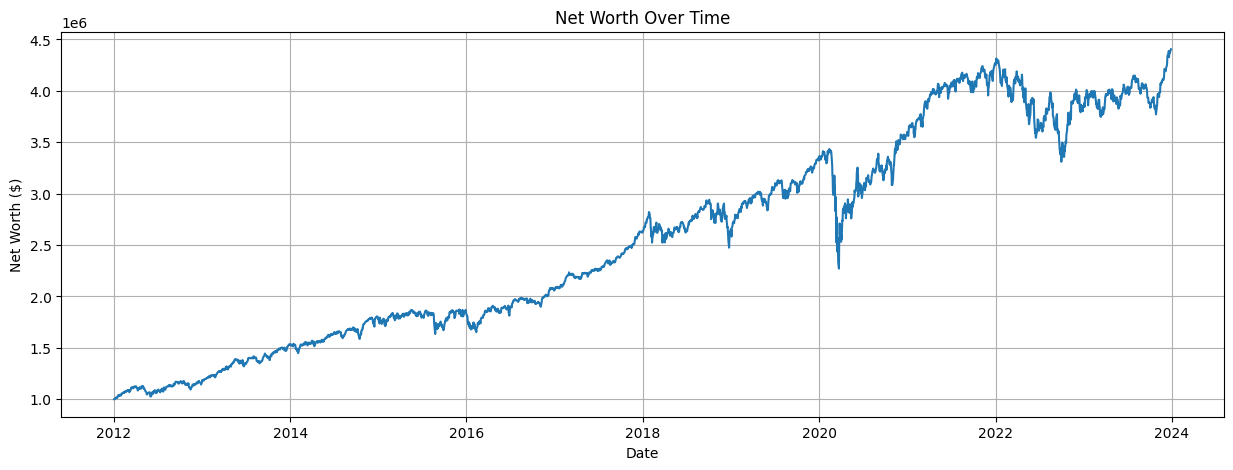

In [43]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_up = calculate_final_investment(up_X_fee, up_B_fee, initial_investment, 0.001, 0.001)

print("Net Worth Over Time:")
print(net_worth_up)

s = pd.Series(net_worth_up, name='up')

# Convert Series to DataFrame
up_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_up.index, net_worth_up)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                ensemble           dji            up
date                                                
2021-04-06  1.000000e+06  1.000000e+06  3.954891e+06
2021-04-07  9.999937e+05  1.000479e+06  3.959730e+06
2021-04-08  9.999314e+05  1.002194e+06  3.961308e+06
2021-04-09  1.001303e+06  1.011079e+06  3.990099e+06
2021-04-12  1.000515e+06  1.009427e+06  3.978914e+06
...                  ...           ...           ...
2022-03-28  1.048540e+06  1.045637e+06  4.147885e+06
2022-03-29  1.062819e+06  1.055757e+06  4.190015e+06
2022-03-30  1.049422e+06  1.053801e+06  4.182035e+06
2022-03-31  1.031126e+06  1.037335e+06  4.113047e+06
2022-04-01  1.037415e+06           NaN  4.125722e+06

[252 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

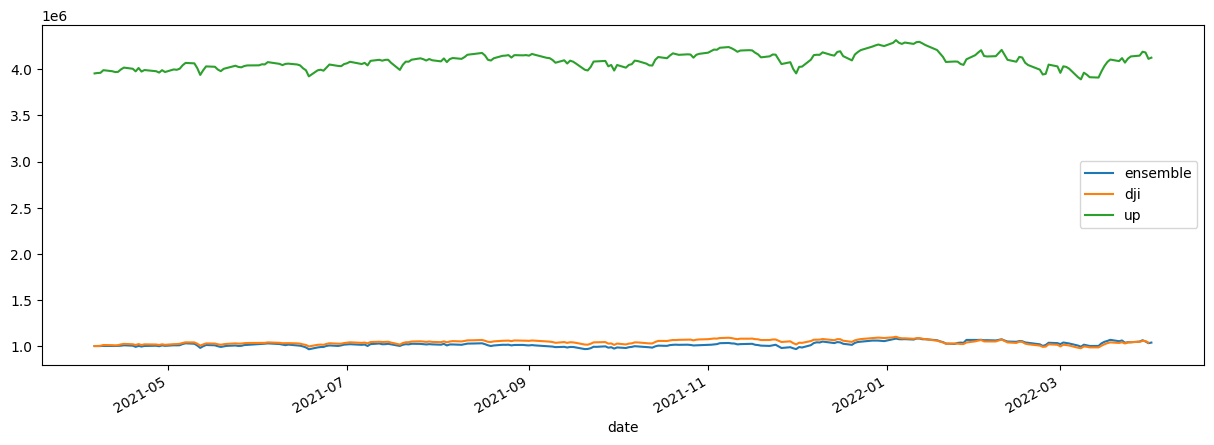

In [44]:
# TODO follow up on this??? How do I factor in the transaction cost here?

result = pd.DataFrame()

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_result_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

up_df_fee.index = pd.to_datetime(up_df_fee.index)

# Join DataFrames on date index
merged_df = result.join(up_df_fee, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (3016, 8)
Annual return          0.097276
Cumulative returns     2.037458
Annual volatility      0.166010
Sharpe ratio           0.642857
Calmar ratio           0.262297
Stability              0.952984
Max drawdown          -0.370862
Omega ratio            1.134857
Sortino ratio          0.897102
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.962287
Daily value at risk   -0.020492
dtype: float64
df_dji:             date           dji
0    2012-01-03  1.000000e+06
1    2012-01-04  1.001697e+06
2    2012-01-05  1.001478e+06
3    2012-01-06  9.969784e+05
4    2012-01-09  9.996217e+05
...         ...           ...
3012 2023-12-21  3.017117e+06
3013 2023-12-22  3.015635e+06
3014 2023-12-26  3.028489e+06
3015 2023-12-27  3.037458e+06
3016 2023-12-28           NaN

[3017 rows x 2 columns]
df_dji:                       dji
date                    
2012-01-03  1.000000e+06
2012-01-04  1.00

<Figure size 1500x500 with 0 Axes>

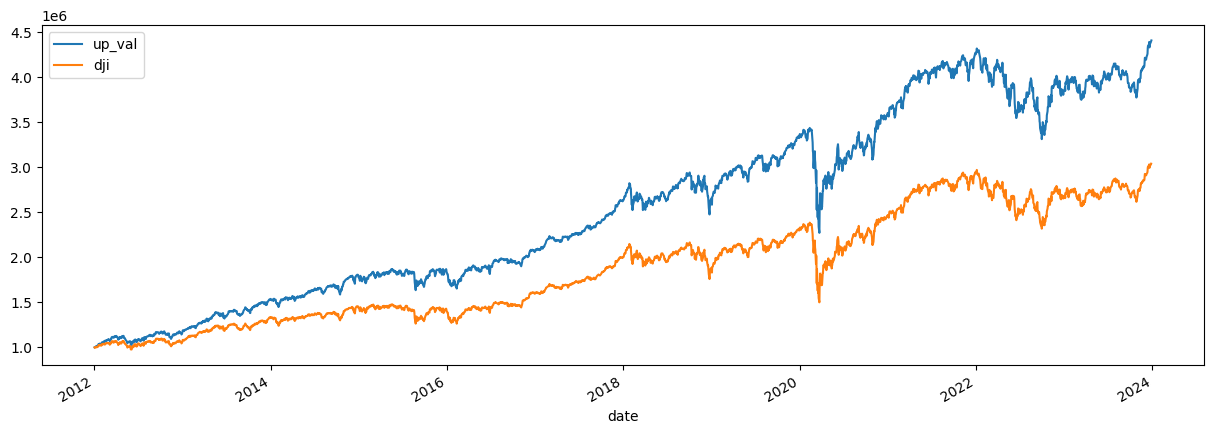

In [45]:
# Try comparing against baseline without ensemble


from finrl.plot import backtest_stats,  get_baseline

first_date = up_df_fee.index.min()
last_date = up_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = up_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_up = pd.DataFrame({'date': up_df_fee.index, 'up_val': up_df_fee['up']})
df_result_up = df_result_up.set_index('date')

print("df_result_up.columns: ", df_result_up.columns)

print("df_result_up: ", df_result_up)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_up, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();


# BAH basline

=====================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.94 ± 0.35
    Ulcer index: 2.65
    Information ratio (wrt benchmark): 0.09
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.03 ± 0.29
    Beta / Alpha: 1.02 / -0.078%
    Annualized return: 15.79%
    Annualized volatility: 16.87%
    Longest drawdown: 479 days
    Max drawdown: 33.36%
    Winning days: 55.6%
    Annual turnover: 0.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 0.94 ± 0.35
    Ulcer index: 2.65
    Information ratio (wrt benchmark): 0.09
    Benchmark sharpe: 0.95 ± 0.35
    Appraisal ratio (wrt benchmark): -0.03 ± 0.29
    Beta / Alpha: 1.02 / -0.078%
    Annualized return: 15.79%
    Annualized volatility: 16.87%
    Longest drawdown: 479 days
    Max drawdown: 33.36%
    Winning days: 55.6%
    Annual turnover: 0.0
        


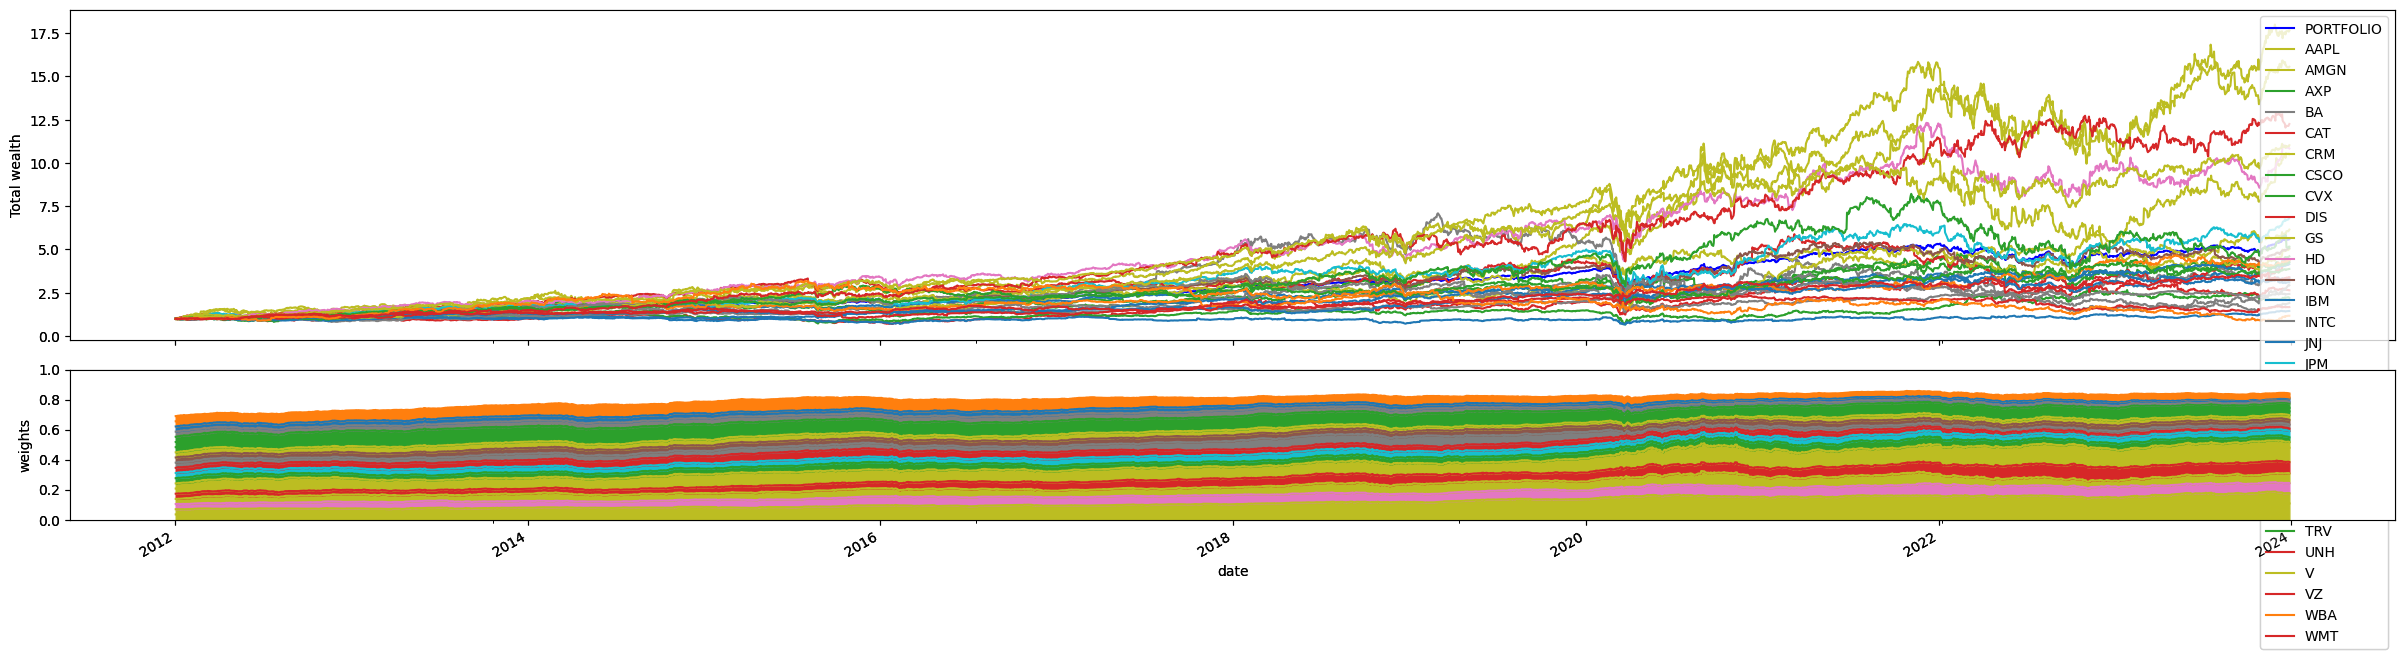

In [46]:
algo = BAH()
result = algo.run(pivot_df)

bah_B = result.B
bah_X = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



bah_B_fee = result_fee.B
bah_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2012-01-03    1.000000e+06
2012-01-04    1.001334e+06
2012-01-05    1.004742e+06
2012-01-06    1.003949e+06
2012-01-09    1.005681e+06
                  ...     
2023-12-21    4.273346e+06
2023-12-22    4.260072e+06
2023-12-26    4.274210e+06
2023-12-27    4.282744e+06
2023-12-28    4.290949e+06
Length: 3017, dtype: float64


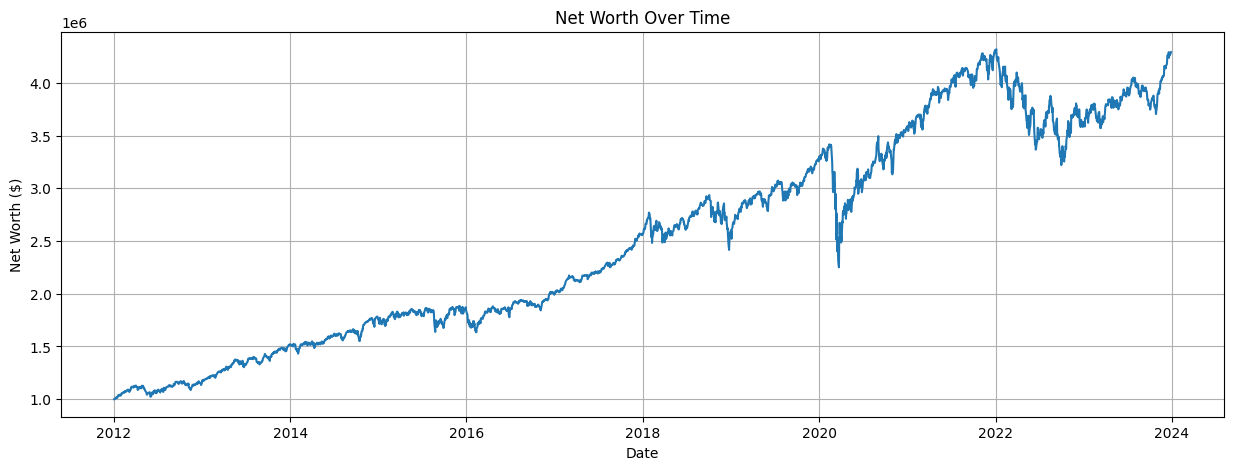

In [47]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bah = calculate_final_investment(bah_X_fee, bah_B_fee, initial_investment, 0.001, 0.001)

print("Net Worth Over Time:")
print(net_worth_bah)

s = pd.Series(net_worth_bah, name='bah')

# Convert Series to DataFrame
bah_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_bah.index, net_worth_bah)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (3016, 8)
Annual return          0.097276
Cumulative returns     2.037458
Annual volatility      0.166010
Sharpe ratio           0.642857
Calmar ratio           0.262297
Stability              0.952984
Max drawdown          -0.370862
Omega ratio            1.134857
Sortino ratio          0.897102
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.962287
Daily value at risk   -0.020492
dtype: float64
df_dji:             date           dji
0    2012-01-03  1.000000e+06
1    2012-01-04  1.001697e+06
2    2012-01-05  1.001478e+06
3    2012-01-06  9.969784e+05
4    2012-01-09  9.996217e+05
...         ...           ...
3012 2023-12-21  3.017117e+06
3013 2023-12-22  3.015635e+06
3014 2023-12-26  3.028489e+06
3015 2023-12-27  3.037458e+06
3016 2023-12-28           NaN

[3017 rows x 2 columns]
df_dji:                       dji
date                    
2012-01-03  1.000000e+06
2012-01-04  1.00

<Figure size 1500x500 with 0 Axes>

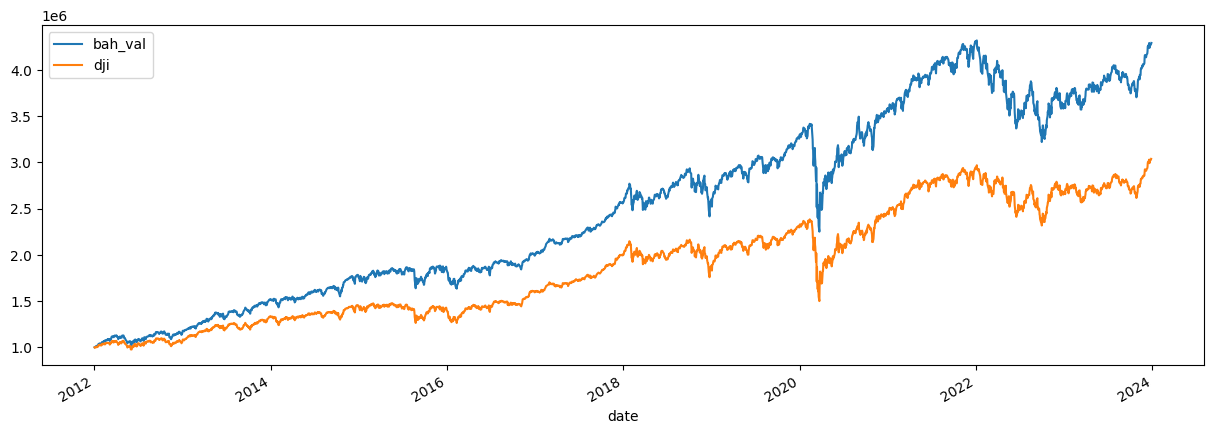

In [48]:
from finrl.plot import backtest_stats,  get_baseline

first_date = bah_df_fee.index.min()
last_date = bah_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = bah_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_bah = pd.DataFrame({'date': bah_df_fee.index, 'bah_val': bah_df_fee['bah']})
df_result_bah = df_result_bah.set_index('date')

print("df_result_bah.columns: ", df_result_bah.columns)

print("df_result_bah: ", df_result_bah)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_bah, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();